In [12]:
from astropy.io import fits
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Read in sources info sheet csv
data = pd.read_csv('Sources Info Sheet - Molecular Catalog.csv')

df = pd.DataFrame(data, columns= ['Star','H2O_15.17_microns (W/m^2)','CALCULATED_H2O_15.17_microns']) #Pontoppidan, calculated

# suppress rows with -99 values
df_loc1 = df.loc[df['H2O_15.17_microns (W/m^2)'] != -99]
df_loc = df_loc1[df['CALCULATED_H2O_15.17_microns'] != -99]

#show table
print (df_loc)

# send values to plot
star_list = df_loc['Star'].tolist()
Pontoppidan = np.array(df_loc['H2O_15.17_microns (W/m^2)'])
Calculated = np.array(df_loc['CALCULATED_H2O_15.17_microns']) #also in W/m^2

#RULUP, AS205, WAOPH6, TWCHA, VZCHA, GQLUP, IQTAU

       Star  H2O_15.17_microns (W/m^2)  CALCULATED_H2O_15.17_microns
0    HT Lup               1.750000e-17                  2.020000e-18
1    GW Lup               1.700000e-18                  3.090000e-18
2    IM Lup               2.400000e-18                  1.150000e-18
3    RU Lup               2.500000e-17                  3.220000e-17
9    AS 205               1.160000e-16                  7.650000e-17
12  DoAr 25               2.100000e-18                  2.910000e-18
17  WaOph 6               1.570000e-17                  1.440000e-17
21   TW Cha               6.100000e-18                  5.640000e-18
22   VZ Cha               9.400000e-18                  7.920000e-18
23   GQ Lup               7.100000e-18                  6.100000e-18
27   RY Lup               6.500000e-18                  2.410000e-18


/var/folders/4c/_90ncs6j0gb05tr7c3125p400000gn/T/ipykernel_790/318705648.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_loc = df_loc1[df['CALCULATED_H2O_15.17_microns'] != -99]


In [13]:
# Read in sources info sheet csv
data = pd.read_csv('Old Molecular Catalog data - Sheet2.csv')

df = pd.DataFrame(data, columns= ['Star','H2O_15.17_microns (W/m^2)','H2O_15.17_uncertainty','CALCULATED_H2O_15.17_microns',
                                  'CALCULATED_H20_15.17_uncertainty']) #Pontoppidan, calculated

# suppress rows with -99 values
df_loc1 = df.loc[df['H2O_15.17_microns (W/m^2)'] != -99]
df_loc = df_loc1[df['CALCULATED_H2O_15.17_microns'] != -99]

#show table
print (df_loc)

# send values to plot
star_list = df_loc['Star'].tolist()
Pontoppidan = np.array(df_loc['H2O_15.17_microns (W/m^2)'])
Calculated = np.array(df_loc['CALCULATED_H2O_15.17_microns']) #also in W/m^2
#RULUP, AS205, WAOPH6, TWCHA, VZCHA, GQLUP, IQTAU

      Star  H2O_15.17_microns (W/m^2)  H2O_15.17_uncertainty  \
0   RU Lup               2.500000e-17           1.300000e-18   
1   AS 205               1.160000e-16           6.500000e-18   
2  WaOph 6               1.570000e-17           7.000000e-19   
3   TW Cha               6.100000e-18           2.000000e-19   
4   VZ Cha               9.400000e-18           5.000000e-19   
5   GQ Lup               7.100000e-18           6.000000e-19   

   CALCULATED_H2O_15.17_microns  CALCULATED_H20_15.17_uncertainty  
0                  3.220000e-17                      3.080000e-18  
1                  7.650000e-17                      1.260000e-17  
2                  1.440000e-17                      2.000000e-18  
3                  5.640000e-18                      5.750000e-19  
4                  7.920000e-18                      1.160000e-18  
5                  6.100000e-18                      1.660000e-18  


<ErrorbarContainer object of 3 artists>

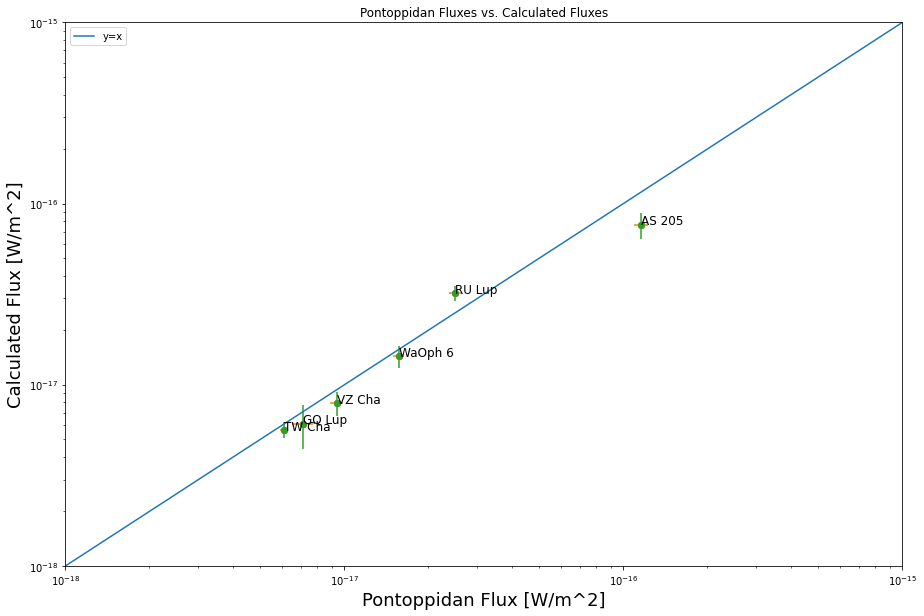

In [17]:
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Pontoppidan, Calculated, 'ro')
for i, (x, y) in enumerate(zip(Pontoppidan, Calculated)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Pontoppidan Flux [W/m^2]',fontsize=18)
ax1.set_ylabel('Calculated Flux [W/m^2]',fontsize=18)



plt.xscale('log')
plt.yscale('log')

x=np.linspace(0,1,num=10)

straight_line = ax1.plot(x,x)

ax1.set_xlim(1e-18, 1e-15)
ax1.set_ylim(1e-18, 1e-15)

ax1.set_title("Pontoppidan Fluxes vs. Calculated Fluxes")

ax1.legend(straight_line, ['y=x'])

#errorbars
p_neg_unc = np.array(df_loc['H2O_15.17_uncertainty'])
p_pos_unc = p_neg_unc #all have the same plus/minus uncertainty

p_error = [p_neg_unc, p_pos_unc]
x = Pontoppidan
y = Calculated
ax1.errorbar(x, y, xerr=p_error, fmt='o')

c_neg_unc = np.array(df_loc['CALCULATED_H20_15.17_uncertainty'])
c_pos_unc = c_neg_unc #all have the same plus/minus uncertainty

c_error = [c_neg_unc, c_pos_unc]
x = Pontoppidan
y = Calculated
ax1.errorbar(x, y, yerr=c_error, fmt='o')

In [7]:
print(Pontoppidan)
print(Calculated)

[1.75e-17 1.70e-18 2.40e-18 2.50e-17 1.16e-16 2.10e-18 1.57e-17 6.10e-18
 9.40e-18 7.10e-18 6.50e-18]
[2.02e-18 3.09e-18 1.15e-18 3.22e-17 7.65e-17 2.91e-18 1.44e-17 5.64e-18
 7.92e-18 6.10e-18 2.41e-18]


In [11]:
percent_error = (Calculated - Pontoppidan)/Pontoppidan



print(percent_error)

[-0.88457143  0.81764706 -0.52083333  0.288      -0.34051724  0.38571429
 -0.08280255 -0.07540984 -0.15744681 -0.14084507 -0.62923077]


[-0.88457143  0.81764706 -0.52083333  0.288      -0.34051724  0.38571429
 -0.08280255 -0.07540984 -0.15744681 -0.14084507 -0.62923077]


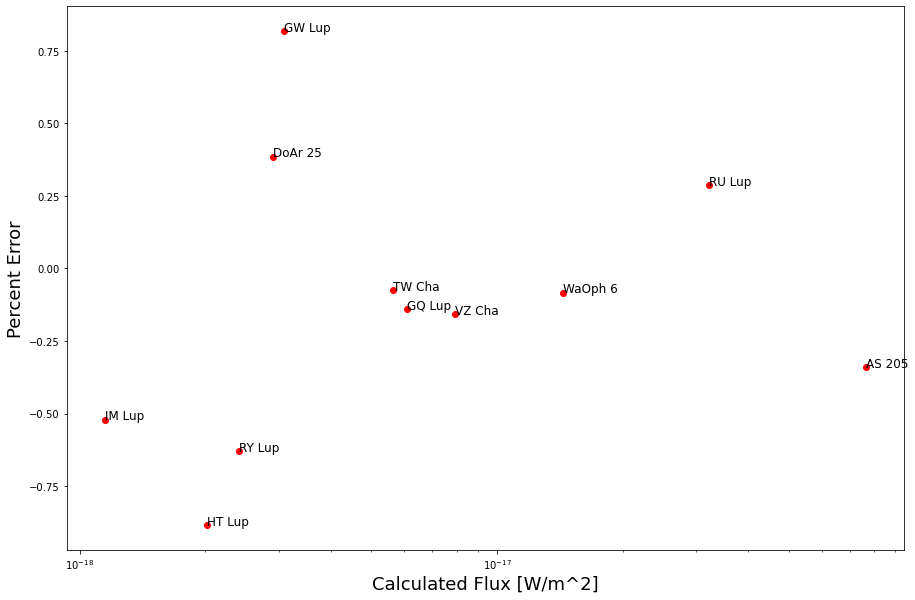

In [16]:
percent_error = (Calculated - Pontoppidan)/Pontoppidan



print(percent_error)


fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Calculated, percent_error, 'ro')
for i, (x, y) in enumerate(zip(Calculated, percent_error)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Calculated Flux [W/m^2]',fontsize=18)
ax1.set_ylabel('Percent Error',fontsize=18)



plt.xscale('log')
#plt.yscale('log')